In [1]:
import os
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path dataset split
output_base_path_aksarali = r'D:\Proyek Aksara\Datasets_split_aksarali'

# Memuat InceptionV3 sebagai model dasar (tanpa lapisan klasifikasi)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Menambahkan lapisan Global Average Pooling
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Menambahkan lapisan Dense untuk klasifikasi
predictions = Dense(18, activation='softmax')(x)  # 18 output classes

# Menggabungkan model dasar InceptionV3 dengan lapisan klasifikasi yang baru
model = Model(inputs=base_model.input, outputs=predictions)

# Menyatakan bahwa lapisan dasar InceptionV3 tidak akan dilatih
for layer in base_model.layers:
    layer.trainable = False

# Compile model dengan optimizer Adam dan loss function categorical crossentropy
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 63, 63,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 63, 63,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 63, 63,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 61, 61,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 30, 30,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 30, 30,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 30, 30,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 21,839,666 (83.31 MB)

 Trainable params: 36,882 (144.07 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [2]:
# ImageDataGenerator untuk augmentasi dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Path dataset split
train_dir = os.path.join(output_base_path_aksarali, 'train')
test_dir = os.path.join(output_base_path_aksarali, 'test')

# Buat generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)


Found 3133 images belonging to 18 classes.
Found 1360 images belonging to 18 classes.


In [3]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping]
)


Epoch 1/50


c:\Users\p\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 482ms/step - accuracy: 0.1454 - loss: 3.2916 - val_accuracy: 0.3353 - val_loss: 2.0812
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 459ms/step - accuracy: 0.3252 - loss: 2.1914 - val_accuracy: 0.3875 - val_loss: 1.8623
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 419ms/step - accuracy: 0.4008 - loss: 1.9088 - val_accuracy: 0.3949 - val_loss: 1.9342
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 453ms/step - accuracy: 0.4029 - loss: 1.9168 - val_accuracy: 0.4441 - val_loss: 1.7583
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 451ms/step - accuracy: 0.4418 - loss: 1.7584 - val_accuracy: 0.4581 - val_loss: 1.6719
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 444ms/step - accuracy: 0.4797 - loss: 1.6490 - val_accuracy: 0.5221 - val_loss: 1.4640
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 484ms/step - accuracy: 0.4933 - loss: 1.6276 - val_accuracy: 0.5199 - val_loss: 1.4773
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 432ms/step - accuracy: 0.4878 - loss: 1.6535 - val_accuracy: 0.516

In [4]:
final_accuracy = history.history['val_accuracy'][-1]
print(f'Akurasi akhir model: {final_accuracy}')

Akurasi akhir model: 0.5566176176071167


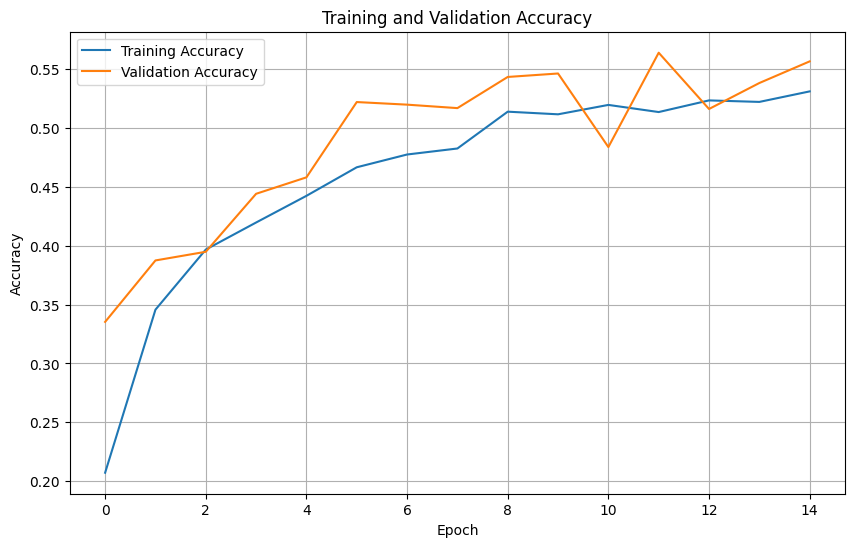

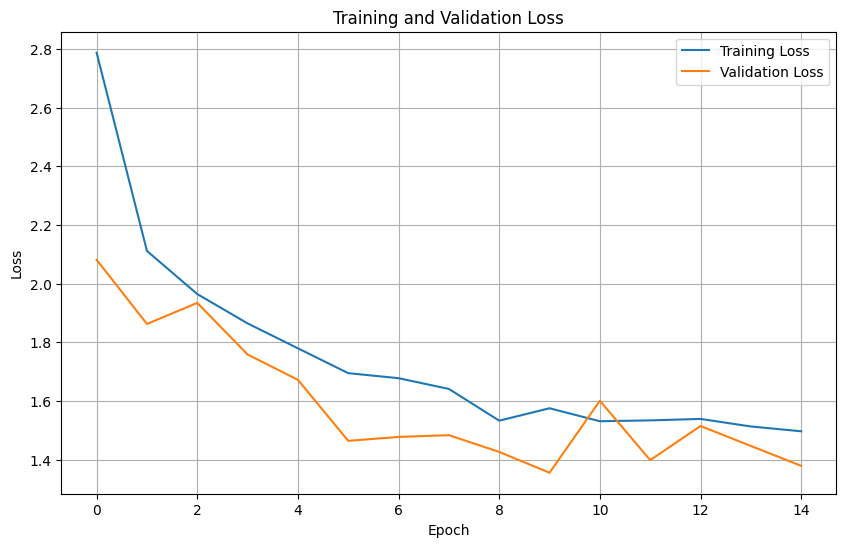

In [5]:
import matplotlib.pyplot as plt

# Plotting akurasi
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Save the model
model.save('aksaraBaliInceptionV3_classifier_model.h5')


In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from ipywidgets import FileUpload, Image, VBox, Output, Label
from IPython.display import display
import io

# Load the model
model = load_model('aksaraBaliInceptionV3_classifier_model.h5')

# Class labels
class_labels = ['ba','ca','da','ga','ha','ja','ka','la','ma','na','nga','nya','pa','ra','sa','ta','wa','ya']
# Function to classify image
def classify_image(img_array):
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    print(f"Raw predictions: {predictions}")  # Debug: Print raw predictions
    predicted_class_idx = np.argmax(predictions)
    print(f"Predicted class index: {predicted_class_idx}")  # Debug: Print predicted class index
    predicted_class = class_labels[predicted_class_idx]
    return predicted_class

# Widget for file upload
upload_widget = FileUpload(accept='image/*', multiple=False)
output = Output()

def on_upload_change(change):
    with output:
        output.clear_output()
        if not upload_widget.value:
            return
        
        # Get the uploaded file
        uploaded_file = upload_widget.value[0]  # Access the first item of the tuple
        print(f"Uploaded file: {uploaded_file}")  # Debug: Print uploaded file information
        content = uploaded_file['content']  # Access the content directly
        
        try:
            # Convert content to image array
            img = load_img(io.BytesIO(content), target_size=(128, 128))
            img_array = img_to_array(img)
            
            # Classify the uploaded image
            predicted_class = classify_image(img_array)
            
            # Display the uploaded image and classification result
            display_img = Image(value=content, format='png', width=300, height=300)
            result_label = Label(f'Classified as: {predicted_class}')
            display(VBox([display_img, result_label]))
        
        except Exception as e:
            print(f"Error processing image: {e}")

upload_widget.observe(on_upload_change, names='value')

# Display the upload widget and output
display(VBox([upload_widget, output]))
